* Name: Vikash Shakya
* Reg. No. : 23122143
* Section : B
* Course : 3 MSc Data Science
* Submitted To : Naived Sir

# 1. Lab Overview
Objectives
* Use the California Housing dataset to perform exploratory data analysis and predict housing prices using a Linear Regression model from the sklearn library. 
* Investigate how various hyperparameters affect the model's performance.


# 2. Problem Approach
* Here,I am  trying to find out the relationship between the Median Income and Median House Price and How Median Income is affecting the House Prices and what are the factors that are affecting the most of it.


# A. Data Exploration and Preprocessing


# Import The Main Libraries

In [337]:
## Most important
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import plotly.express as px
from pandas.plotting import scatter_matrix
from sklearn.datasets import fetch_california_housing

# Load The DataSet

In [338]:
data  = fetch_california_housing(as_frame=True)
dataset = data.frame
dataset

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0        -122.23        4.526  
1        -122.22        3.585  
2        -122.24        3.521  
3        -122.25        3.413  
4        -122.25        3.422  
...          ...          ...  
20635    -121.09        0.781  
20636    -121.21        0.771  
20637    -121.22        0.923  
20638    -121.32        0.847  
20639    -121.24        0.894  

[20640 rows x 9 columns]

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bureau publishes sample data (a block group typically has a population
of 600 to 3,000 people).

A household is a group of people residing within a home. Since the average
number of rooms and bedrooms in this dataset are provided per household, these
columns may take surprisingly large values for block groups with few households
and many empty houses, such as vacation resorts.

It can be downloaded/loaded using the
:func:`sklearn.datasets.fetch_california_housing` function.

.. topic:: References

    - Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
      Statistics and Probability Letters, 33 (1997) 291-297

# Inspect The Data

As written in the description, the dataset contains aggregated data regarding each district in California. Let’s have a close look at the features that can be used by a predictive model.

* Preliminary Analysis:


In [410]:
dataset.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude MedHouseVal  
0    -122.23       4.092  
1    -122.22       4.092  
2    -122.24       4.092  
3    -122.25       4.092  
4    -122.25       4.092

In [340]:
dataset.shape

(20640, 9)

In [341]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Focusing on the average rooms, average bedrooms, average occupation, and population, the range of the data is large with unnoticeable bin for the largest values. It means that there are very high and few values (maybe they could be considered as outliers?). We can see this specificity looking at the statistics for these features:

In [342]:
dataset.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

For each of these features, comparing the max and 75% values, we can see a huge difference. It confirms the intuitions that there are a couple of extreme values.

In this dataset, we have information regarding the demography (income, population, house occupancy) in the districts, the location of the districts (latitude, longitude), and general information regarding the house in the districts (number of rooms, number of bedrooms, age of the house). Since these statistics are at the granularity of the district, they corresponds to averages or medians.

# Exploratory Data Analysis (EDA)

In [344]:
dataset.nunique()

MedInc         12928
HouseAge          52
AveRooms       19392
AveBedrms      14233
Population      3888
AveOccup       18841
Latitude         862
Longitude        844
MedHouseVal     3842
dtype: int64

 We can see that:
**the dataset contains 20,640 samples and 8 features;

all features are numerical features encoded as floating number;

there is no missing values.

Let’s have a quick look at the distribution of these features by plotting their histograms.

* Visualization

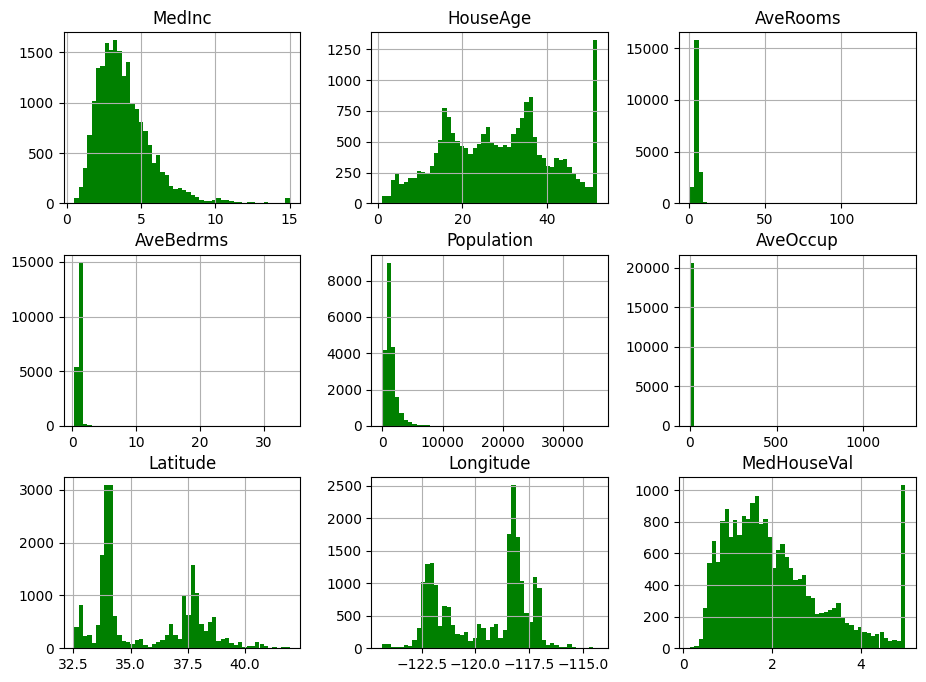

In [345]:
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(11,8),color='Green')
plt.show()

We can first focus on features for which their distributions would be more or less expected.

The median income is a distribution with a long tail. It means that the salary of people is more or less normally distributed but there is some people getting a high salary.

Regarding the average house age, the distribution is more or less uniform.

The target distribution has a long tail as well. In addition, we have a threshold-effect for high-valued houses: all houses with a price above 5 are given the value 5.

In [346]:
dataset['HouseAge'].value_counts()

HouseAge
52.0    1273
36.0     862
35.0     824
16.0     771
17.0     698
34.0     689
26.0     619
33.0     615
18.0     570
25.0     566
32.0     565
37.0     537
15.0     512
19.0     502
27.0     488
24.0     478
30.0     476
28.0     471
20.0     465
29.0     461
31.0     458
23.0     448
21.0     446
14.0     412
22.0     399
38.0     394
39.0     369
42.0     368
44.0     356
43.0     353
40.0     304
13.0     302
41.0     296
45.0     294
10.0     264
11.0     254
46.0     245
5.0      244
12.0     238
8.0      206
9.0      205
47.0     198
4.0      191
48.0     177
7.0      175
6.0      160
50.0     136
49.0     134
3.0       62
2.0       58
51.0      48
1.0        4
Name: count, dtype: int64

In [347]:
dataset.value_counts()

MedInc   HouseAge  AveRooms   AveBedrms  Population  AveOccup  Latitude  Longitude  MedHouseVal
0.4999   10.0      6.740000   2.040000   108.0       2.160000  34.69     -116.90    0.55000        1
4.2500   34.0      6.063910   0.996241   631.0       2.372180  38.53     -121.51    1.91900        1
4.2458   52.0      3.912999   1.064483   1830.0      1.873081  37.80     -122.42    4.50000        1
4.2454   33.0      6.073746   1.064897   1073.0      3.165192  34.12     -117.87    1.83800        1
                   4.604207   1.021033   1644.0      3.143403  33.88     -118.36    2.36800        1
                                                                                                  ..
2.8919   52.0      5.140506   1.089873   2290.0      2.898734  34.10     -118.14    2.58400        1
2.8917   33.0      4.699346   1.009804   1378.0      4.503268  34.20     -118.37    1.70400        1
2.8913   23.0      5.038674   0.977901   1146.0      3.165746  36.43     -119.85    0.60900     

<Axes: >

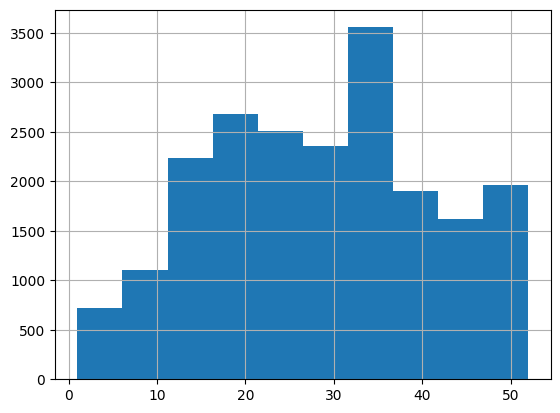

In [348]:
dataset['HouseAge'].hist()

<Axes: >

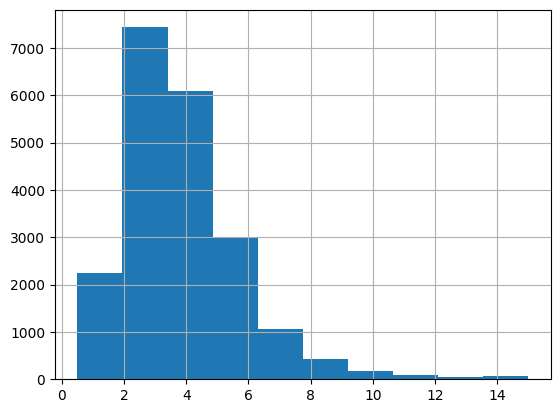

In [349]:
dataset['MedInc'].hist()

<Axes: >

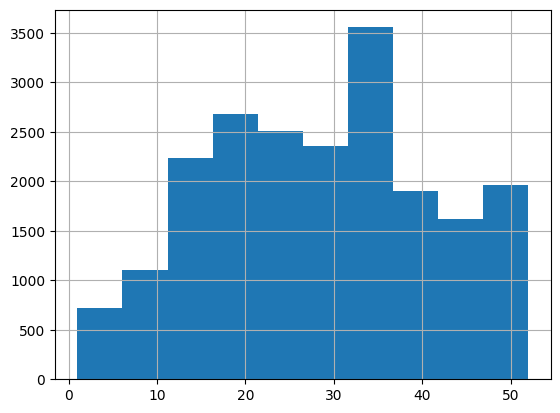

In [350]:
dataset['HouseAge'].hist()

<Axes: >

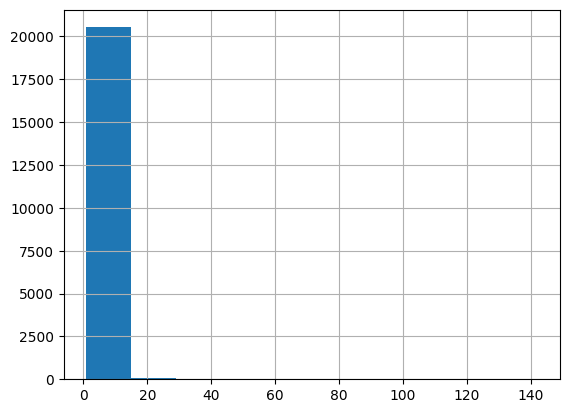

In [351]:
dataset['AveRooms'].hist()

<Axes: >

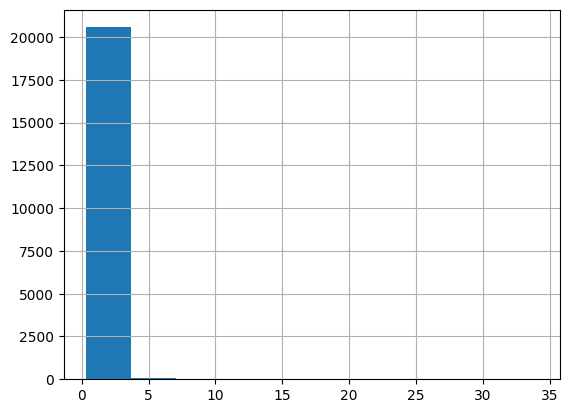

In [352]:
dataset['AveBedrms'].hist()

<Axes: >

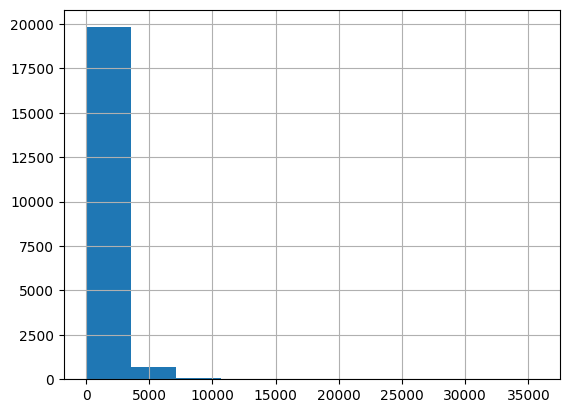

In [353]:
dataset['Population'].hist()

<Axes: >

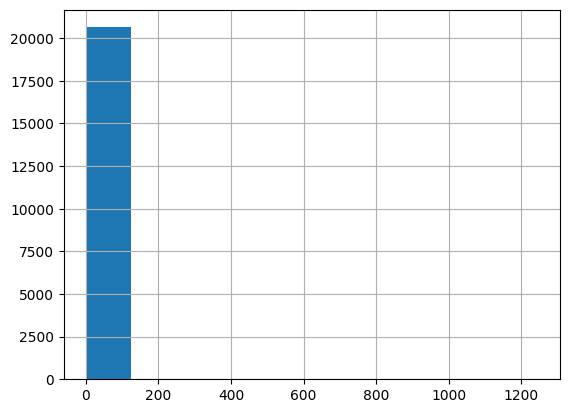

In [354]:
dataset['AveOccup'].hist()

<Axes: ylabel='Frequency'>

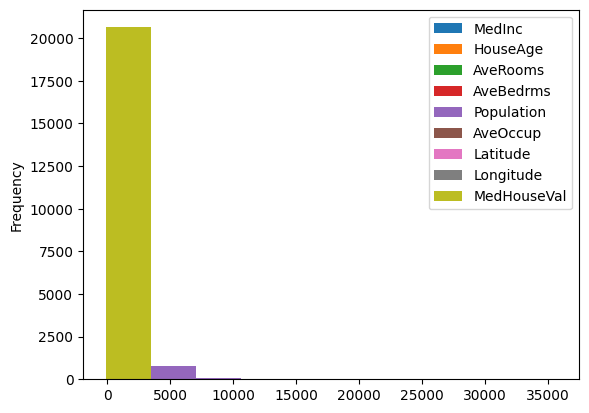

In [355]:
dataset.plot(kind = 'hist')

* Data Cleaning:


In [415]:
dataset.isnull().sum()


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

<Axes: >

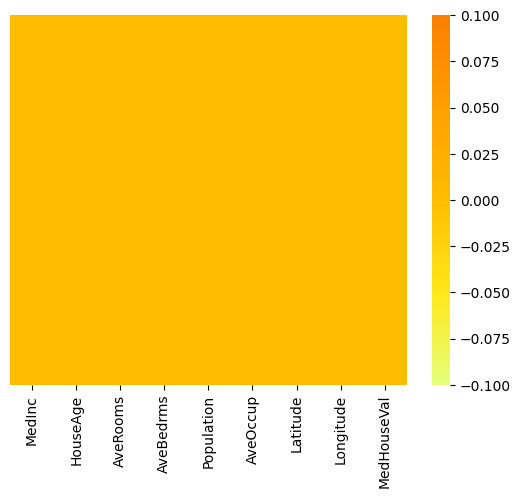

In [416]:
sns.heatmap(dataset.isnull(),yticklabels=False,cmap='Wistia')


This code utilizes the seaborn library (`sns`) in Python to create a heatmap visualization of missing values in the dataset.

Here's a summary of each part of the code:

1. `sns.heatmap`: This function creates a heatmap plot using seaborn.

2. `dataset.isnull()`: This method checks for missing values in the dataset and returns a DataFrame of boolean values, where `True` indicates a missing value and `False` indicates a non-missing value.

3. `yticklabels=False`: This parameter specifies whether to display the y-axis tick labels on the heatmap. In this case, it's set to `False`, indicating that y-axis tick labels should not be shown.

4. `cmap='Wistia'`: This parameter sets the color map for the heatmap. `'Wistia'` is a specific color map available in seaborn, which provides a yellowish color scheme.

Overall, this code creates a heatmap visualization where missing values are highlighted, allowing for a quick and intuitive assessment of the completeness of the dataset.

Scatterplots are a fundamental graph type—much less complicated than histograms and boxplots. As such, we might use the Mathplotlib library instead of the Seaborn library. But since we have already used Seaborn, I will stick with it here. Just know that there are many ways to create scatterplots and other basic graphs in Python.

To create a bare-bones scatterplot, we must do four things:

Load the seaborn library

Specify the source data frame

Set the x axis, which is generally the name of a predictor/independent variable

Set the y axis, which is generally the name of a response/dependent variable

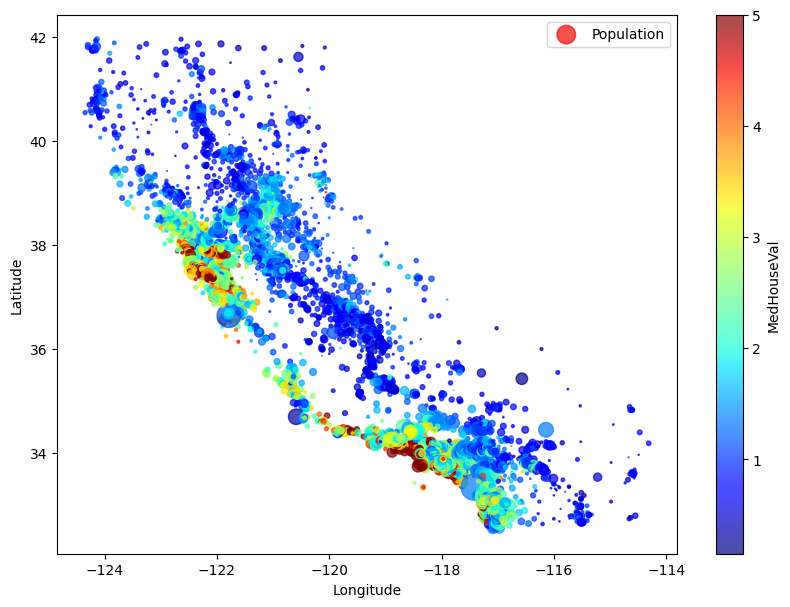

In [357]:
dataset.plot(kind="scatter", x="Longitude",y="Latitude", c="MedHouseVal", cmap="jet", colorbar=True, legend=True, sharex=False, figsize=(10,7), s=dataset['Population']/100, label="Population", alpha=0.7)
plt.show()

Now comes the interesting idea. Our data contains lat/long coordinates for each housing district. Each coordinate represent the geographic center of the district. As a start, let’s do a simple scatter plot of all the districts in our data. Note the familiar shape that emerges.

<Axes: xlabel='Longitude', ylabel='Latitude'>

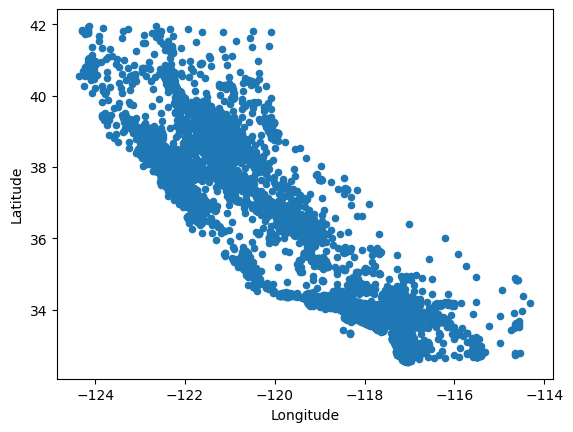

In [358]:
dataset.plot(kind = "scatter",x="Longitude",y="Latitude")

<Axes: xlabel='Longitude', ylabel='Latitude'>

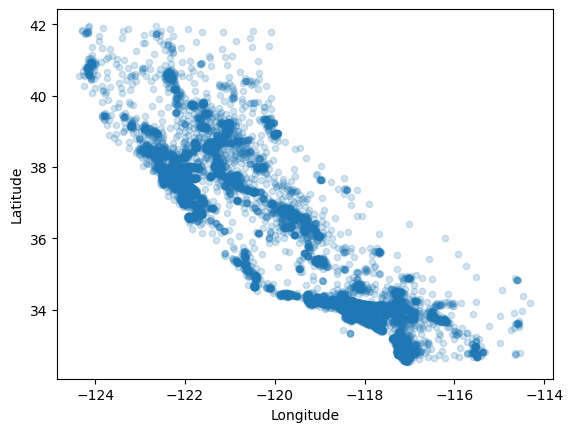

In [359]:
dataset.plot(kind="scatter",x="Longitude",y="Latitude",alpha=0.2)

In the following plot command, the c parameter is telling us which column value to use to determine the color given by the colormap. The s parameter is determining the size of the point being plotted. Thus the value of the median_house_value for a point will determine its color, and the value in the population column (divided by 100) will determine its size.

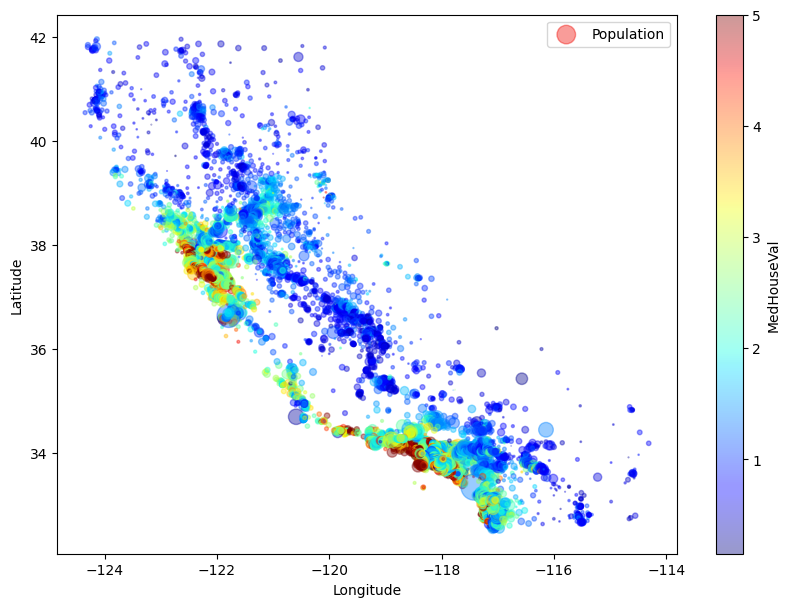

In [360]:
dataset.plot(kind="scatter", x="Longitude", y="Latitude",
    s=dataset['Population']/100, label="Population",
    c="MedHouseVal", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

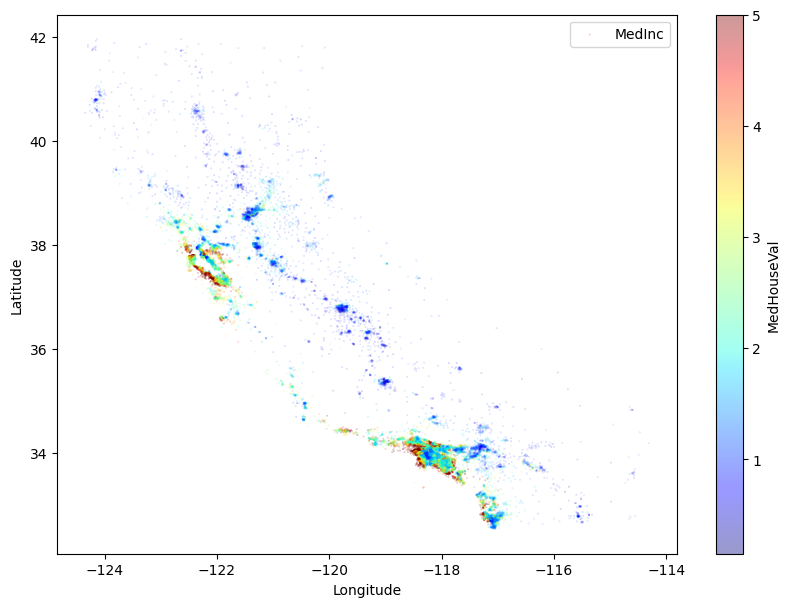

In [361]:
dataset.plot(kind="scatter", x="Longitude", y="Latitude",
    s=dataset['MedInc']/100, label="MedInc",
    c="MedHouseVal", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

This code creates a scatter plot using data from the dataset. Here's a breakdown of what each part of the code does:

1. `dataset.plot(kind="scatter", x="Longitude", y="Latitude", ...)`:
   - This line specifies the creation of a scatter plot.
   - The `x` and `y` parameters specify which columns from the dataset will be plotted on the x-axis and y-axis, respectively (`Longitude` and `Latitude` in this case).

2. `s=dataset['MedInc']/100`:
   - This parameter (`s`) specifies the size of the markers (points) in the scatter plot.
   - The size is determined by the values in the `MedInc` column, divided by 100 (`dataset['MedInc']/100`).

3. `label="MedInc"`:
   - This parameter assigns a label to the markers representing `MedInc`.
   - This label will be used when creating the legend.

4. `c="MedHouseVal", cmap=plt.get_cmap("jet")`:
   - This parameter (`c`) specifies the color of the markers.
   - The color is determined by the values in the `MedHouseVal` column.
   - `cmap=plt.get_cmap("jet")` sets the colormap to 'jet', which is a predefined color map in matplotlib.

5. `colorbar=True`:
   - This parameter adds a color bar to the plot, indicating the mapping of `MedHouseVal` values to colors.

6. `alpha=0.4`:
   - This parameter sets the transparency of the markers to 0.4, making them slightly transparent.

7. `figsize=(10,7)`:
   - This parameter sets the size of the figure (plot) to 10 inches in width and 7 inches in height.

8. `plt.legend()`:
   - This line adds a legend to the plot based on the labels assigned earlier.

9. `plt.show()`:
   - This command displays the plot.

Overall, this code creates a scatter plot where the x-axis represents longitude, the y-axis represents latitude, the size of the markers represents median income (`MedInc`), and the color of the markers represents median house value (`MedHouseVal`). The legend provides a visual guide for interpreting the plot.

plt.title("House Value Distribution Plot")
sns.distplot(dataset['MedHouseVal'])
plt.show()

Up to know, we discarded the longitude and latitude that carry geographical information. In short, the combination of this feature could help us to decide if there are locations associated with high-valued houses. Indeed, we could make a scatter plot where the x- and y-axis would be the latitude and longitude and the circle size and color would be linked with the house value in the district.

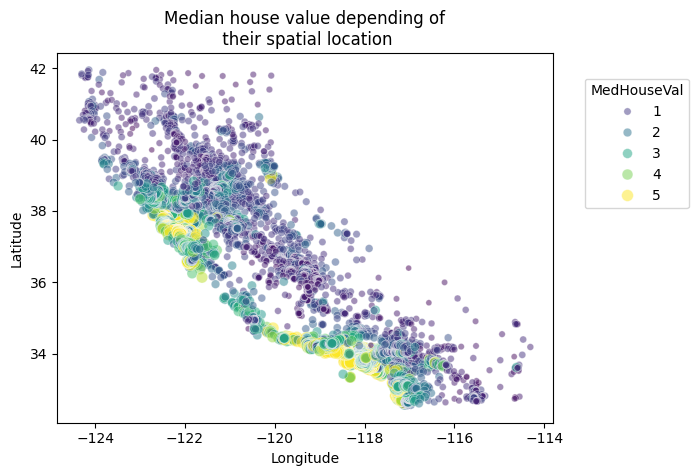

In [364]:
import seaborn as sns

sns.scatterplot(
    data=data.frame,
    x="Longitude",
    y="Latitude",
    size="MedHouseVal",
    hue="MedHouseVal",
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

If you are not familiar with the state of California, it is interesting to notice that all datapoints show a graphical representation of this state. We note that the high-valued houses will be located on the coast, where the big cities from California are located: San Diego, Los Angeles, San Jose, or San Francisco.

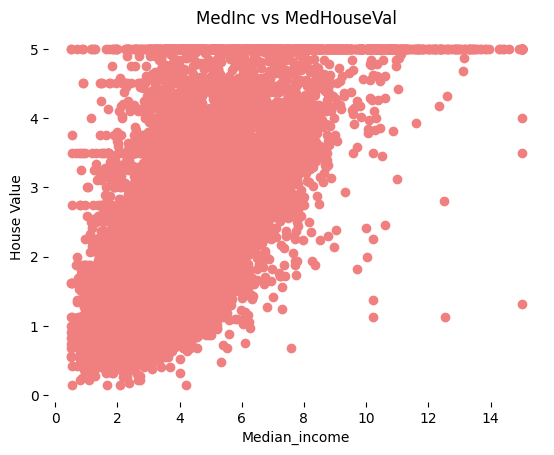

In [365]:
plt.scatter(dataset["MedInc"],dataset["MedHouseVal"],color = 'lightcoral')
plt.title("MedInc vs MedHouseVal")
plt.xlabel('Median_income')
plt.ylabel('House Value')
plt.box(False)
plt.show()

In [384]:
x = dataset.drop(["MedHouseVal"],axis=1).values
y= dataset['MedHouseVal'].values

Next, we split our dataset into training and testing sets. For simplicity, let's use only one feature, MedInc (median income in block), which shows a strong positive correlation with MedHouseVal:

# B. Model Building


* Data Splitting: Split the dataset into training and testing sets.


In [385]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

Now, we can build the linear regression model:

In [386]:
from sklearn.preprocessing import RobustScaler
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(X_train)
x_test = ro_scaler.fit_transform(X_test)

In [387]:
y_train

[1.1975, 4.0920, 1.6055, 0.5650, 0.5650, ..., 2.0500, 0.5650, 2.0500, 2.7435, 4.0920]
Length: 16512
Categories (6, float64): [0.5650 < 1.1975 < 1.6055 < 2.0500 < 2.7435 < 4.0920]

# C. Linear Regression Model

* Model Fitting: Fit a Linear Regression model to the training data.


In [388]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [389]:
regressor.score(X_train,y_train)

0.4253516460020472

# D. Hyperparameter Tuning and Model Evaluation

For each hyperparameter setting, fit the model to the training data and evaluate its performance on the test set, based on the evaluation metrics that are given below.

In [390]:
regressor.score(X_test,y_test)

0.4104478241589652

* Explore at least two hyperparameters in the Linear Regression model.
* For instance, experiment with different settings of fit_intercept and normalize.

In [391]:
regressor.intercept_

0.5291368922282536

In [394]:
regressor.coef_

array([0.39034074])

* Prediction: Make predictions on the test set.


After the model is trained, we can use it to predict the house values in the test set and visualize the results:

In [413]:
# Predict the dependent variable using the trained model
y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

In [395]:
df_1 = pd.DataFrame({'y_test':y_test,'Y_pred':y_pred_test})

In [396]:
df_1.head()

y_test    Y_pred
0  0.5650  1.185378
1  0.5650  1.517206
2  4.0920  1.887562
3  2.0500  2.768756
4  2.7435  1.983156

Now we can plot a graph comapring the predicted and actual values.

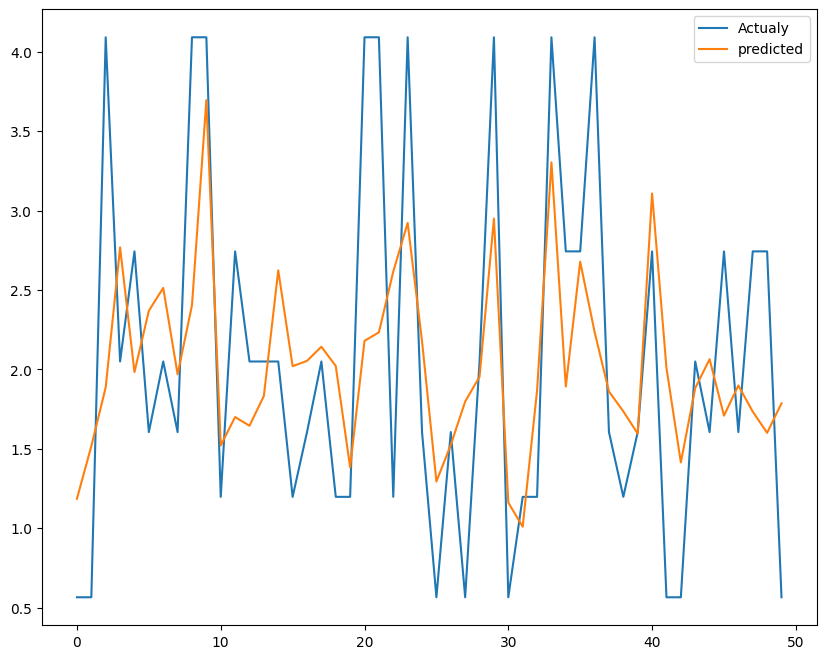

In [397]:
plt.figure(figsize=(10,8))
plt.plot(df_1[:50])
plt.legend(["Actually","predicted"]);

This code creates a line plot comparing the first 50 values of two series from the DataFrame `df_1`: one series labeled "Actually" and another labeled "predicted". Here's a summary of each part:

1. `plt.figure(figsize=(10,8))`:
   - This line creates a new figure with a specified size of 10 inches in width and 8 inches in height.

2. `plt.plot(df_1[:50])`:
   - This line plots the first 50 values of each series contained in the DataFrame `df_1`.
   - By default, `plot()` assumes the index of `df_1` as the x-axis values.

3. `plt.legend(["Actually", "predicted"])`:
   - This line adds a legend to the plot, specifying the labels "Actually" and "predicted" for each series.

4. `plt.show()`:
   - This command displays the plot.

Overall, this code visualizes the first 50 values of two series ("Actually" and "predicted") from the DataFrame `df_1` using a line plot. It provides a quick comparison between the actual and predicted values.

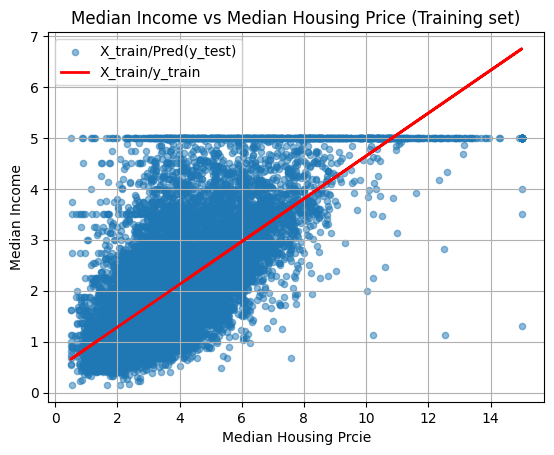

In [376]:
plt.scatter(X_train,y_train,s=20,alpha=0.5,label = 'Actual')
plt.plot(X_train,y_pred_train,color='Red',linewidth=2,label='Predicted')
plt.grid(True)
plt.title("Median Income vs Median Housing Price (Training set)")
plt.xlabel("Median Housing Prcie")
plt.ylabel("Median Income")
plt.legend(['X_train/Pred(y_test)','X_train/y_train'])
plt.box(True)

plt.show()

This code creates a scatter plot with the training data points (`X_train`, `y_train`) and overlays a line plot representing the predicted values (`y_pred_train`) against the actual values (`y_train`). Here's a summary of each part:

1. `plt.scatter(X_train, y_train, s=20, alpha=0.5, label='Actual')`:
   - This line creates a scatter plot with the training data points.
   - `X_train` is plotted on the x-axis and `y_train` on the y-axis.
   - `s=20` sets the size of the markers to 20.
   - `alpha=0.5` sets the transparency of the markers to 0.5.
   - `label='Actual'` assigns a label to this set of data points for the legend.

2. `plt.plot(X_train, y_pred_train, color='red', linewidth=2, label='Predicted')`:
   - This line overlays a line plot on the same graph.
   - It plots `X_train` against `y_pred_train`, which are the predicted values.
   - `color='red'` sets the color of the line to red.
   - `linewidth=2` sets the width of the line to 2 pixels.
   - `label='Predicted'` assigns a label to this line plot for the legend.

3. `plt.grid(True)`: 
   - This line adds a grid to the plot.

4. `plt.title("Median Income vs Median Housing Price (Training set)")`: 
   - This line sets the title of the plot.

5. `plt.xlabel("Median Housing Price")` and `plt.ylabel("Median Income")`:
   - These lines set the labels for the x-axis and y-axis, respectively.

6. `plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'])`:
   - This line adds a legend to the plot, specifying labels for the data points and the line plot.

7. `plt.box(True)`: 
   - This line enables the bounding box around the plot.

8. `plt.show()`: 
   - This command displays the plot.

Overall, this code visually compares the actual and predicted values of median income against median housing price using a scatter plot for actual values and a line plot for predicted values. It provides insights into the performance of the predictive model.

This is making a list of all the columns in our dataset

In [377]:
list(dataset.columns)

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude',
 'MedHouseVal']

As we saw with SAS Enterprise Guide and R, it is sometimes useful to add a best fit line (with confidence intervals around the slope) to a scatterplot. But let’s be clear: this is not one of these situations. It is obvious from the scatterplot above that the relationship between concrete strength and fly ash is only weakly linear.

The easiest way to “add” a best-fit line to a scatterplot is to use a different plotting method. Seaborn’s lmplot() method (where “lm” stands for “linear model”) is one possibility:

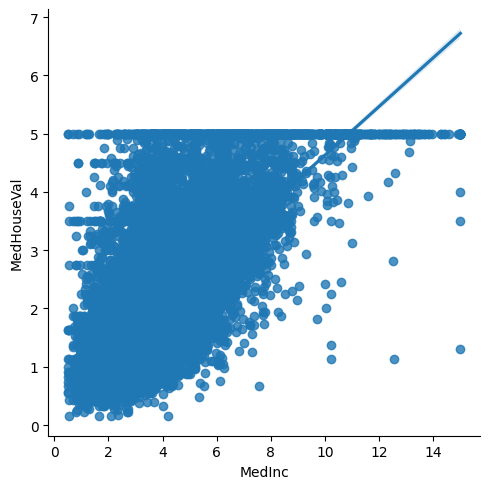

In [378]:
sns.lmplot(x="MedInc",y="MedHouseVal",data=dataset)

Certainly! This code generates a scatterplot matrix using the pandas and matplotlib libraries in Python. The matrix visualizes the relationships between multiple attributes (columns) of a dataset. Each scatterplot in the matrix displays the relationship between two different attributes, while the diagonal of the matrix contains histograms showing the distribution of each attribute. The size of the resulting plot is set to 12 inches in width and 8 inches in height. 

Overall, it's a concise and effective way to explore the relationships and distributions within a dataset visually.

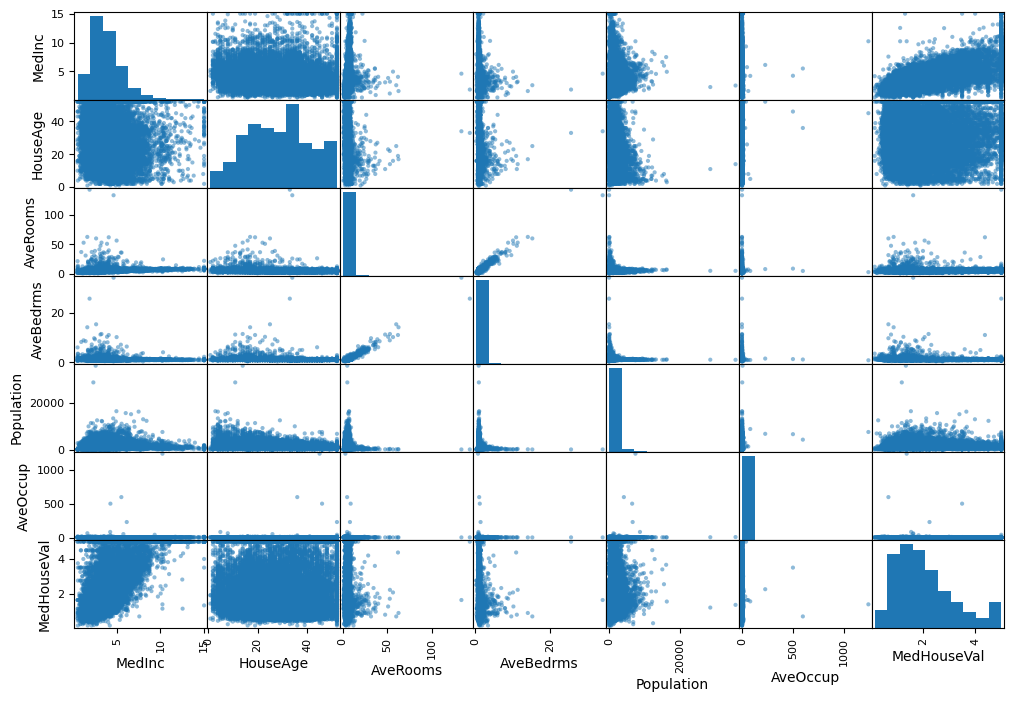

In [379]:
attributes = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup','MedHouseVal']
scatter_matrix(dataset[attributes], figsize=(12,8))
plt.show()

We can make a final analysis by making a pair plot of all features and the target but dropping the longitude and latitude. We will quantize the target such that we can create proper histogram.

In [380]:
corr = dataset.corr()
corr['MedHouseVal'].sort_values(ascending=True)
import pandas as pd

# Drop the unwanted columns
columns_drop = ["Longitude", "Latitude"]
# Quantize the target and keep the midpoint for each interval
dataset["MedHouseVal"] = pd.qcut(dataset["MedHouseVal"], 6, retbins=False)
dataset["MedHouseVal"] = dataset["MedHouseVal"].apply(lambda x: x.mid)

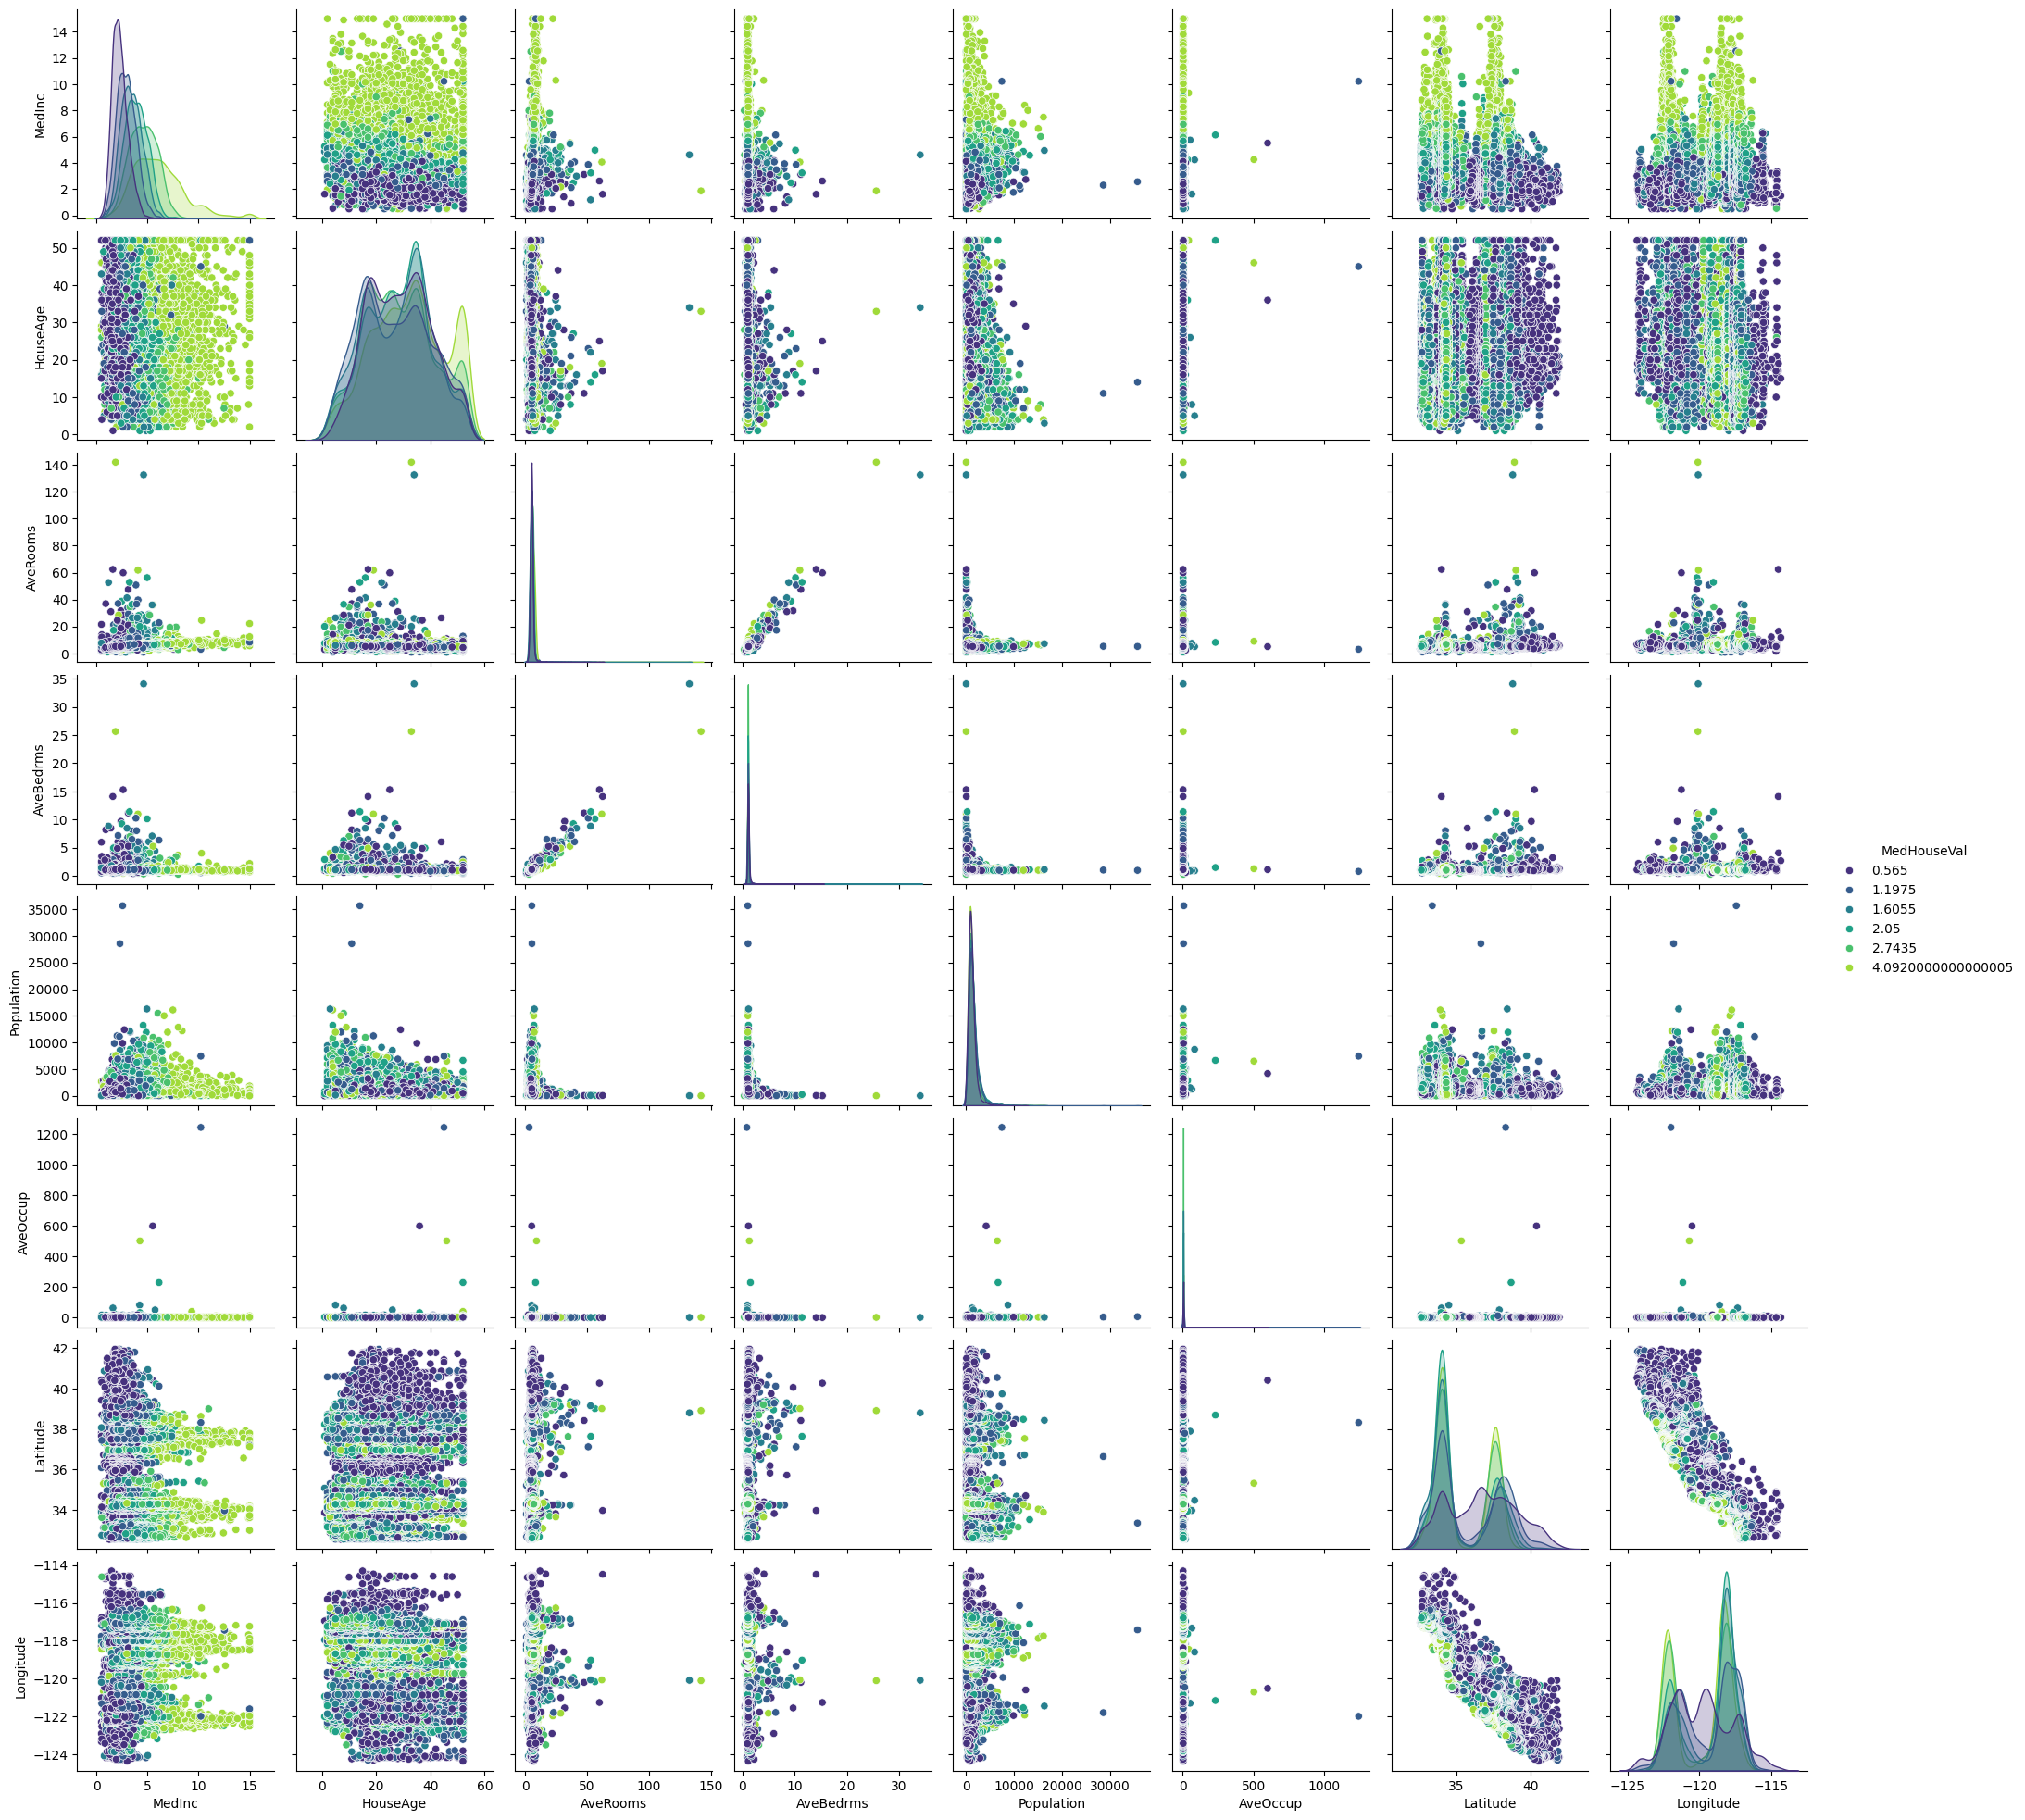

In [381]:
_ = sns.pairplot(data=dataset, hue="MedHouseVal", palette="viridis")

While it is always complicated to interpret a pairplot since there is a lot of data, here we can get a couple of intuitions. We can confirm that some features have extreme values (outliers?). We can as well see that the median income is helpful to distinguish high-valued from low-valued houses.

Thus, creating a predictive model, we could expect the longitude, latitude, and the median income to be useful features to help at predicting the median house values.

A correlation matrix is a handy way to calculate the pairwise correlation coefficients between two or more (numeric) variables. The Pandas data frame has this functionality built-in to its corr() method, which I have wrapped inside the round() method to keep things tidy. Notice that every correlation matrix is symmetrical:
The correlation between each variable and itself is 1.0, hence the diagonal.

In [412]:
cormat = dataset.corr().round(2)
plt.figure(figsize=(10,8))


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

Python, and its libraries, make lots of things easy. For example, once the correlation matrix is defined (I assigned to the variable cormat above), it can be passed to Seaborn’s heatmap() method to create a heatmap (or headgrid). The basic idea of heatmaps is that they replace numbers with colors of varying shades, as indicated by the scale on the right. Cells that are lighter have higher values of r. This type of visualization can make it much easier to spot linear relationships between variables than a table of numbers

We can explore the relationship between the features and the target variable by visualizing the correlation matrix:

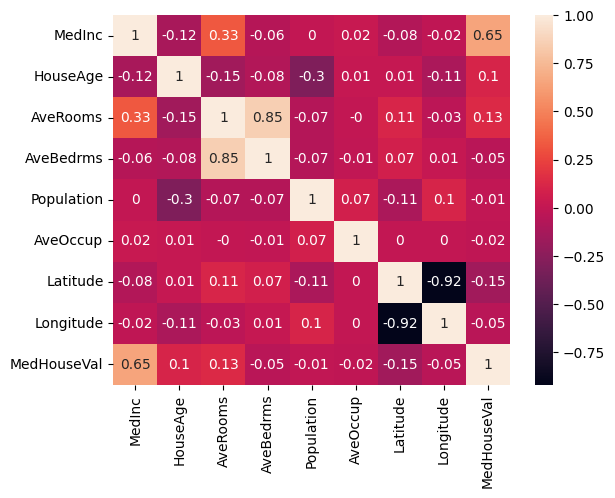

In [383]:
sns.heatmap(data=cormat,annot=True);

# E. Evaluation Metrics:

Finally, we can evaluate the model's performance using the Root Mean Squared Error (RMSE) and R² Score:

In [402]:
reg_score = r2_score(y_test,y_pred_test)
reg_score

0.4104478241589652

In [414]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
mse = mean_squared_error(y_test , y_pred_test)
mse

0.7603659733880233

Here we are calculating the Root mean squared error

In [404]:
reg_mse = mean_squared_error(y_test , y_pred_test)
reg_rmse = np.sqrt(reg_mse)
reg_rmse

0.8719896635786591

* Calculate and compare the Root Mean Square Error (RMSE) and  R² Score for each model configuration.

In [405]:
reg_rmse < reg_score

False

Mean Squared Error (MSE), Root Mean Squared Error (RMSE), or Coefficient of Determination (R-squared), you can use these metrics to quantitatively assess how well the line fits the set of points in the testing dataset. Here's how you can interpret each metric:

* Mean Squared Error (MSE): MSE measures the average of the squares of the errors or residuals. A lower MSE indicates better model performance, as it means the model's predictions are closer to the actual values.
* Root Mean Squared Error (RMSE): RMSE is the square root of the MSE. It provides an interpretation of the average magnitude of the residuals in the same units as the target variable. Like MSE, a lower RMSE indicates better model performance.
* Coefficient of Determination (R-squared): R-squared measures the proportion of the variance in the target variable that is predictable from the independent variables. It ranges from 0 to 1, with higher values indicating better model fit. An R-squared of 1 means the model perfectly predicts the target variable based on the independent variables.

 Write a small interpretation on how well the line fits the set of points that are present in the testing dataset.


Since our, MSE and RMSE are high and R-squared is low (close to 0), it suggests that the model does not fit the testing dataset well and is not able to explain much of the variance in the target variable.